# Signal Processing Notebook: 01
### Additive interaction between modes
### Amplitude modulated signal showing beat phenomenon

This Notebook explains the Spectral Analysis of an artificial signal using Fourier spectral analysis, Spectrogram, Pwelch metchod and Hilbert Huang Transform. Artificial Signals are composed of two sinusoids with additive and multiplicative interactions between modes. 

$$ x_1 = 1.1 \times \sin{\frac{2\pi }{33} t} + 1.2 \times \sin{\frac{2\pi}{25} t} + Noise $$

Here the signal is stationary and linear due to additive interaction between modes. It is purely an amplitude modulated signal due to beat phenomemon. Beat phenomenon occurs when two signals with slightly different frequencies are superimposed. As a
result, an oscillation with a slowly pulsating intensity is produced.


#### Contents of Notebook

1. Importing necessary libraries for signal processing, computing, plotting images
2. Signal Construction
3. Fourier Spectrum
4. Spectrogram
5. Pwelch Method
6. Hilbert Huang Transform


#### Sources to learn Python, Numpy, SciPy, Pandas, Matplotlib:

* [Automate the Boring Stuff](https://automatetheboringstuff.com/)
* [Dive into Python3](https://diveintopython3.net/)
* [Python for Everyone](https://www.py4e.com/)
* [Numpy User guide](https://numpy.org/doc/stable/numpy-user.pdf)
* [Pandas User guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Pandas dataframe](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)
* [Scipy Lecture Notes](http://scipy-lectures.org/index.html)
* [Scipy Signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html)
* [Matplotlib](http://scipy-lectures.org/intro/matplotlib/index.html)
* [Seaborn](https://seaborn.pydata.org/)
* [EMD](https://emd.readthedocs.io/en/stable/emd_tutorials/index.html)

Feel free to write me feedback at vishusharma296@gmail.com\

You can find the related codes, documentation and my other open access projects and research on my github: [Vishu's github](https://github.com/Vishusharma296)


**Author: Vishu Sharma** 

-Last Update: 01.08.2023\
-First Version: 26.09.2021\
-Version: 03_2023



In [1]:
# Importing Libraries

%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import seaborn as sns


from scipy.fft import fft, ifft, rfft, rfftfreq
from scipy import signal
from scipy import ndimage

import emd

In [2]:
# Figure settings

sns.set(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
# Signal Properties

fs = .125                            # Sampling frequency
N = 512                              # Number of data points
T = 1/fs                             # Sampling period (one sample at every 8 seconds)
t = np.arange(N) / float(fs)         # Time vector 

r=2*np.pi

In [4]:
# Checking dimensions of time vector and its values

#print(t)
np.shape(t)

(512,)

#### Signal construction

In [5]:
# Signal components

A = 1.1*np.sin(1/33*r*t);
B = 1.2*np.sin(1/25*r*t);

noise_power = 0.01 * fs / 2           # Noise power
rng = np.random.default_rng()         # random number generator
Noise = rng.normal(scale=np.sqrt(noise_power), size=t.shape);


### Signal with additive interaction between modes showing beat phenomenon

$$ x_1 = 1.1 \times \sin{\frac{2\pi }{33} t} + 1.2 \times \sin{\frac{2\pi}{25} t} + Noise $$

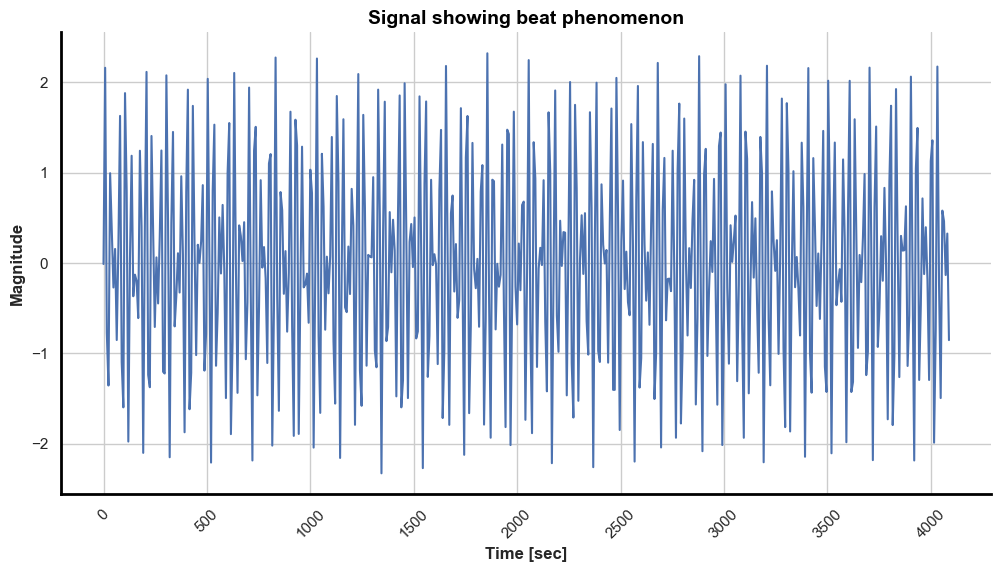

In [21]:
x1 = A + B  + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x1, 'b')

plt.title('Signal showing beat phenomenon', fontsize=14, fontweight='bold', color='black')

plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)


sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP01_01_TD01_Beat.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

#### Frequency spectrum for signal with additive interaction between modes using  FFT 

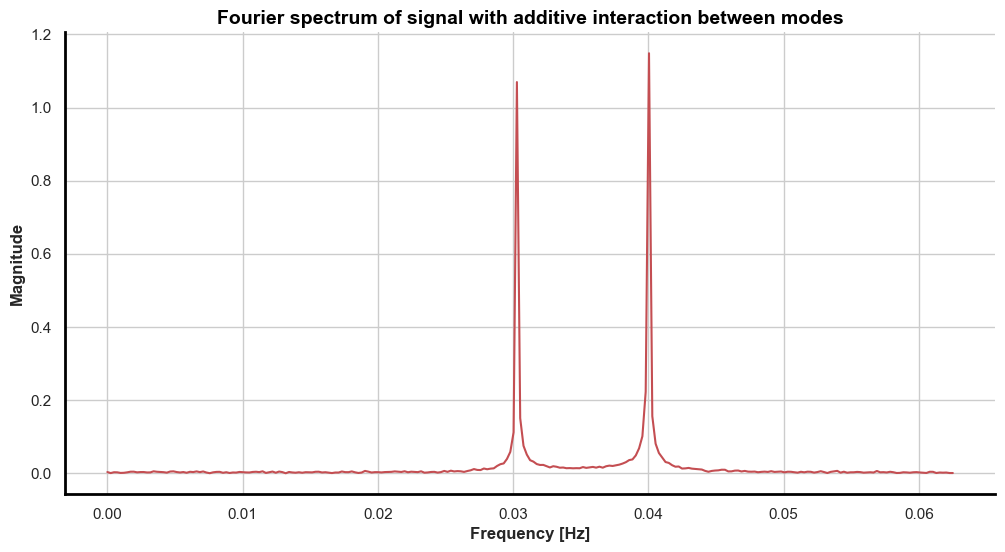

In [7]:
# Fourier Spectrum of signal x1 using SciPy

FFT_x1 = rfft(x1)                                      # FFT of real input signal
Freq_x1 = rfftfreq(len(x1), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x1 =  np.abs(FFT_x1)/(0.5*len(x1))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x1, FFT_normalized_x1, 'r') 
plt.title('Fourier spectrum of signal with additive interaction between modes', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("FD01_Additive_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

#### Spectrogram for signal with additive interaction between modes

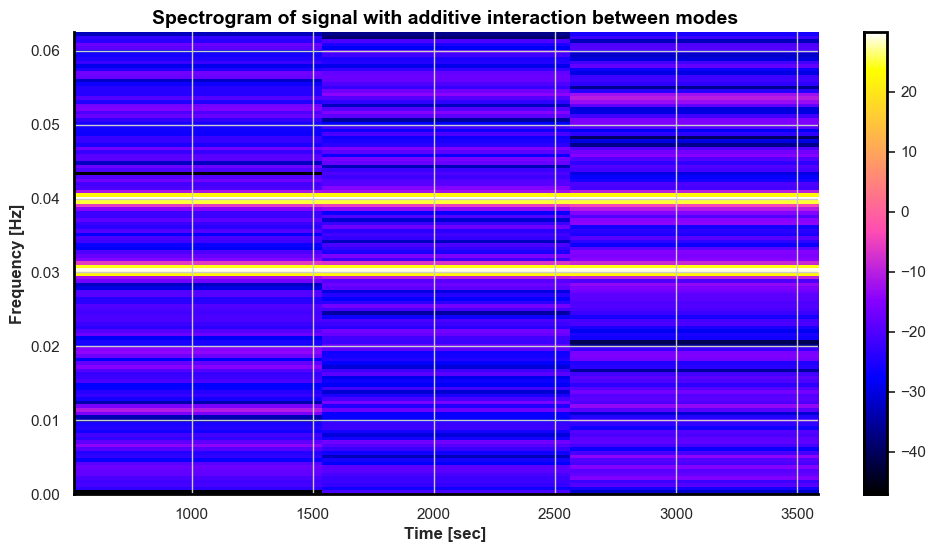

In [8]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x1, Fs = fs, NFFT = 256, noverlap = 128, cmap= 'gnuplot2')

plt.title('Spectrogram of signal with additive interaction between modes', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)



## Saving the image
resolution_value = 600
plt.savefig("TFD01_Additive_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

### Signal with multiplicative interaction between modes

$$ x_2 = \sin{\frac{2\pi }{33} t} \times \sin{\frac{2\pi}{25} t} + Noise $$

<Figure size 1200x600 with 0 Axes>

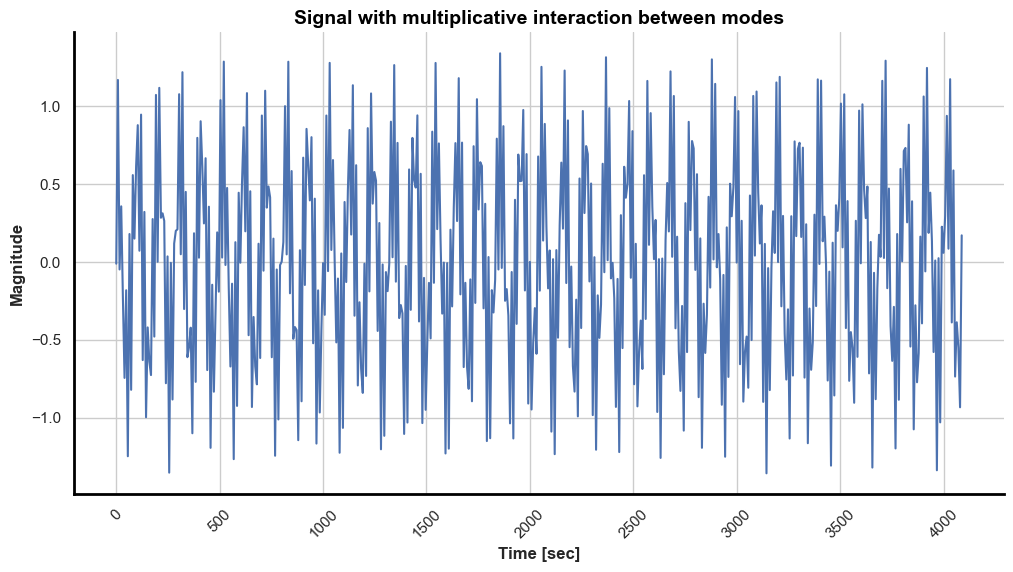

In [9]:
x2 = A * B + Noise;
t = np.arange(N) / float(fs)        # Time vector

plt.figure(2)


#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x2, 'b')

plt.title('Signal with multiplicative interaction between modes', fontsize=14, fontweight='bold', color='black')

plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude',  fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)


sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("TD01_Multiplicative_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

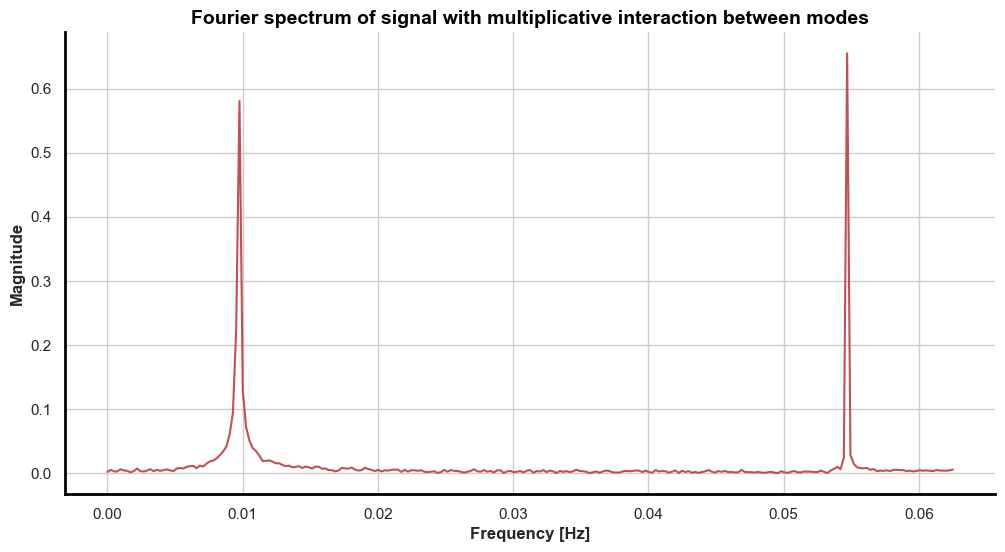

In [10]:
# Fourier Spectrum for signal with multiplicative interaction between modes

FFT_x2 = rfft(x2)                                      # FFT of real input signal
Freq_x2 = rfftfreq(len(x2), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x2 = np.abs(FFT_x2)/(0.5*len(x2))       # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x2, FFT_normalized_x2, 'r') 
plt.title('Fourier spectrum of signal with multiplicative interaction between modes', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("FD01_Multiplicative_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

#### Explanation for the spectrum

Signal contains two sinusoids with Frequency 30 mHZ and 40 mHZ. But due to multiplicative interaction between modes, Fourier spectrum shows 10mHz and 70mHz. Mathematical explanation of why we are seeing 10 mHz (40-30) and 70 mHz (30+40) in spectrum instead of expected 30mHz and 40mHz:


$$\sin{a}\sin{b}=  \frac{1}{2} [\cos{(a-b)} - \cos{(a+b)}]$$


Mathematically it makes perfect sense but physically it is meaningless. 10 mHz and 70 mHz does not exist in
signal and the spectrum obtained is misleading. Fourier Spectral analysis gives misleading frequency content in the case when modes interact multiplicatively.

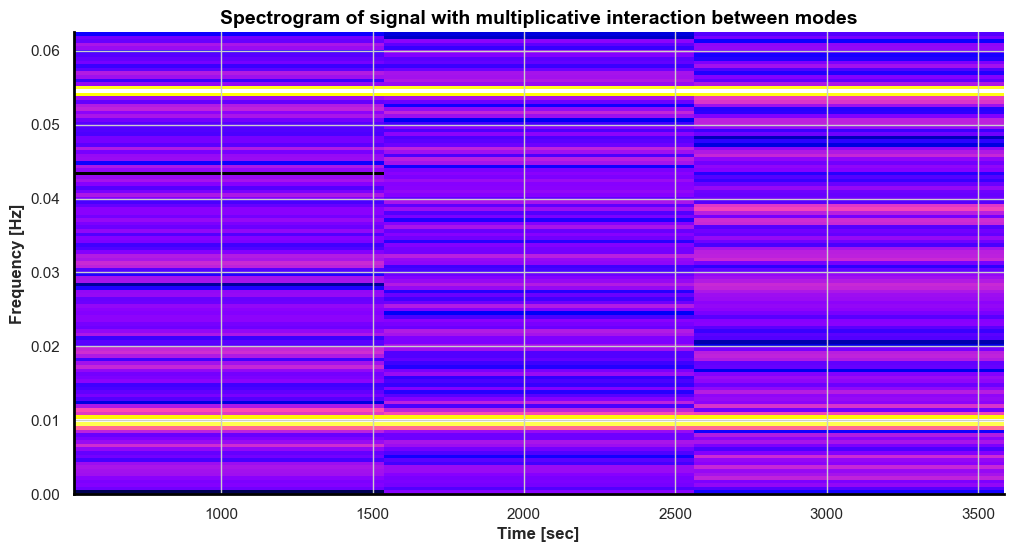

In [11]:
plt.specgram(x2, Fs = fs, NFFT = 256, noverlap = 128, cmap= 'gnuplot2')

plt.title('Spectrogram of signal with multiplicative interaction between modes', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

#plt.colorbar()


sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("TFD02_Multiplicative_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


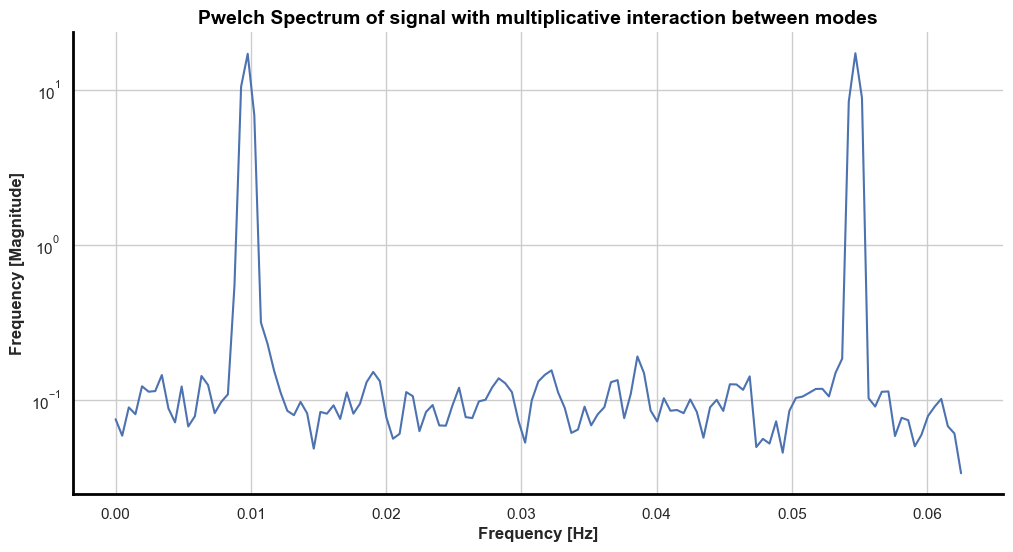

In [12]:
# Pwelch method for calculation spectrum of signal x2

fx2, Pxx = signal.welch(x2, fs, window ='hann')
plt.figure()
plt.semilogy(fx2, np.sqrt(Pxx))

plt.title('Pwelch Spectrum of signal with multiplicative interaction between modes', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Magnitude]', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("PW01_Multiplicative_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)



### Hilbert Spectral Analysis using Hilbert Huang Transform

In [13]:
# Doing Empirical mode decomposition of signals x1 and x2

t = np.arange(N) / float(fs)                  # Time vector
#imf = emd.sift.sift(x)
imf_x1 = emd.sift.mask_sift(x1, max_imfs=5)   # Intrinsic mode functions of signal x1
imf_x2 = emd.sift.mask_sift(x2, max_imfs=5)   # Intrinsic mode functions of signal x2


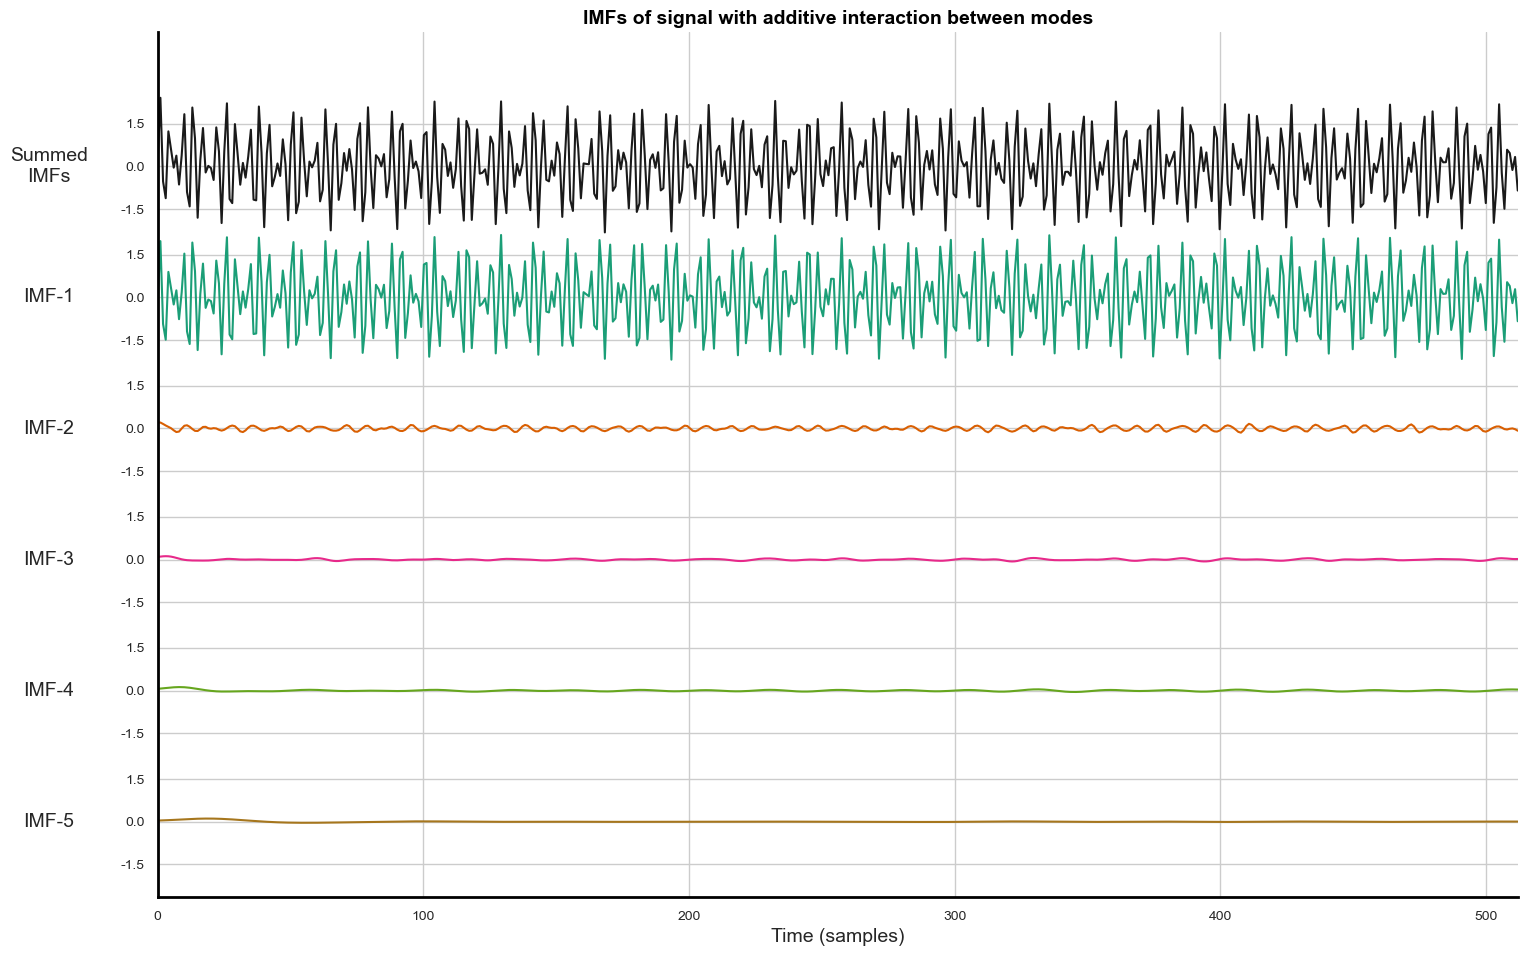

In [14]:
#Visualising the resulting IMFs of signal x1

emd.plotting.plot_imfs(imf_x1)
plt.title('IMFs of signal with additive interaction between modes', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("IMFs01_Additive_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)



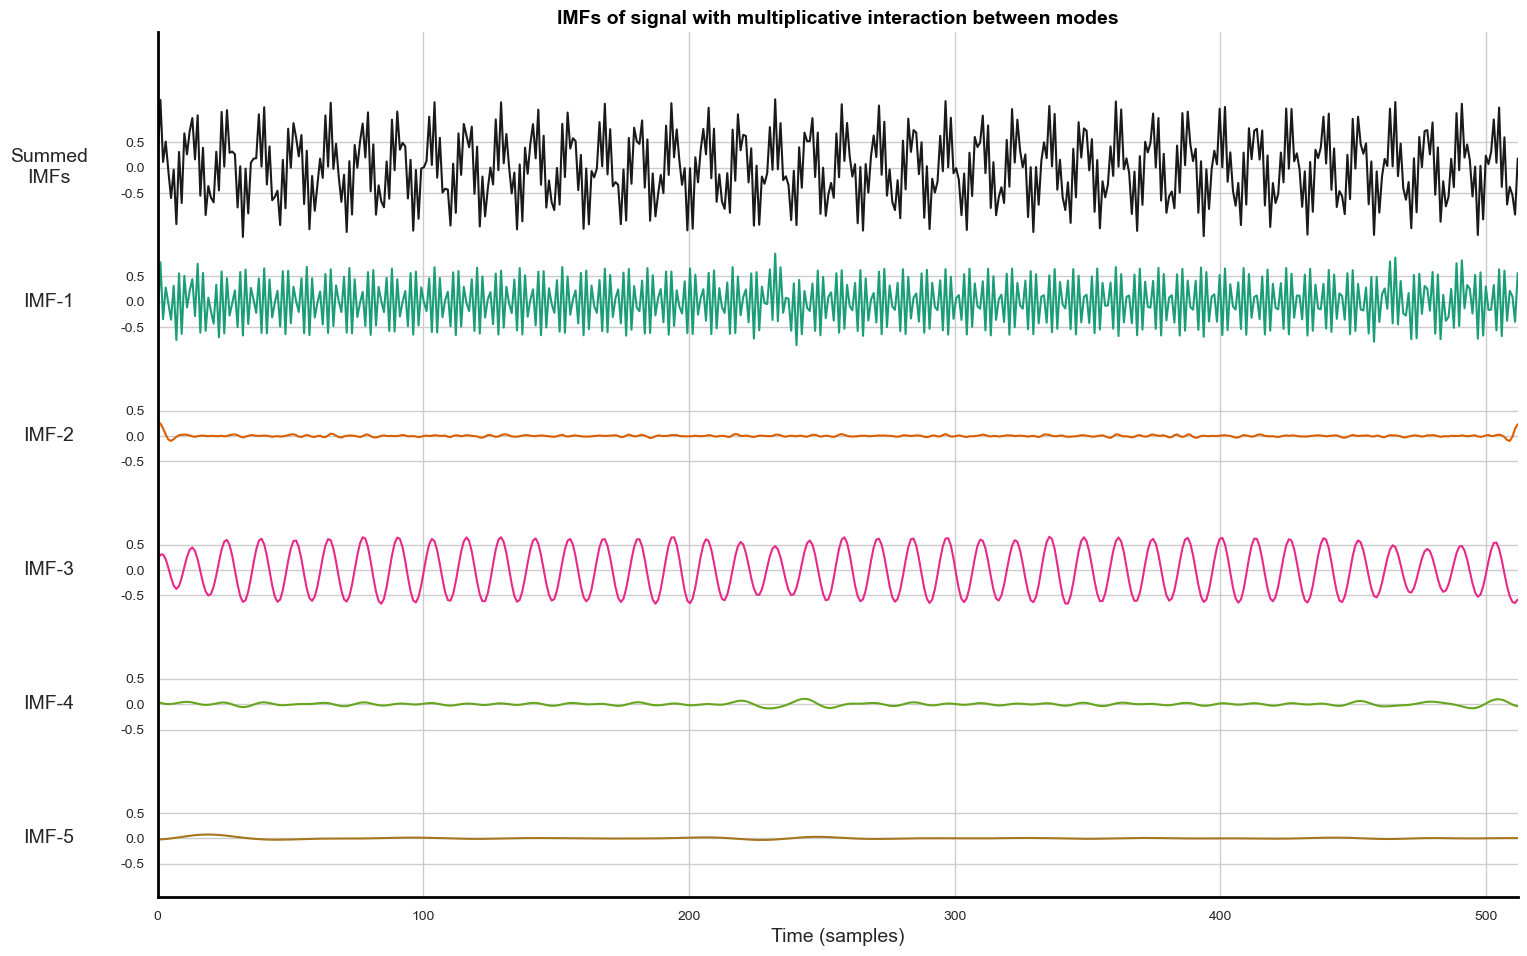

In [15]:
#Visualising Resulting IMFs of signal x2

emd.plotting.plot_imfs(imf_x2)
plt.title('IMFs of signal with multiplicative interaction between modes', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 1200
plt.savefig("IMFs02_Multiplicative_interaction.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)



In [16]:
#Computing instantaneous phase, instantaneous frequency and amplitude.

IP_x1, IF_x1, IA_x1 = emd.spectra.frequency_transform(imf_x1, fs, 'hilbert')
IP_x2, IF_x2, IA_x2 = emd.spectra.frequency_transform(imf_x2, fs, 'hilbert')

Text(0, 0.5, 'Frequency [Hz]')

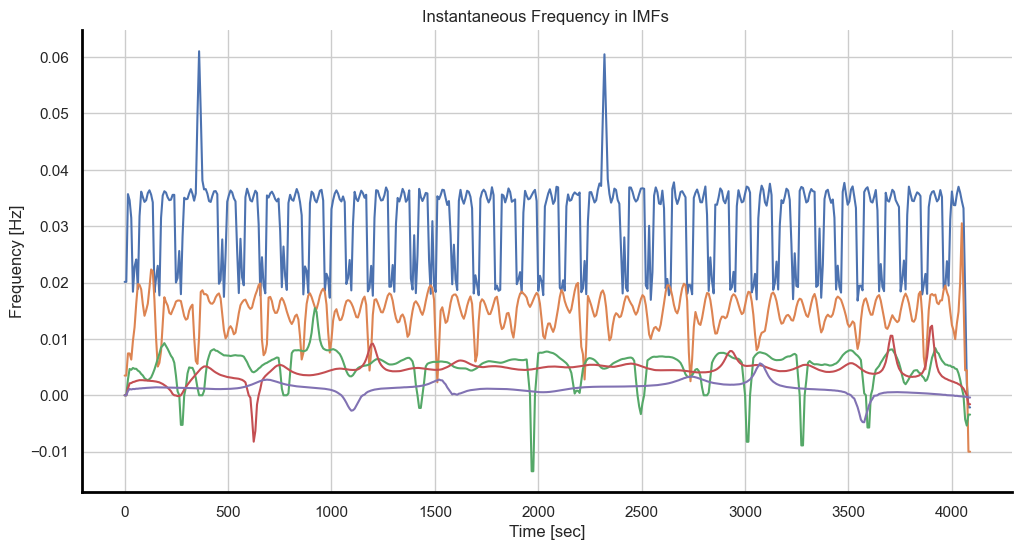

In [17]:
# Plotting instantaneous frequency for signal 1

plt.plot(t, IF_x1)
plt.title('Instantaneous Frequency in IMFs ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

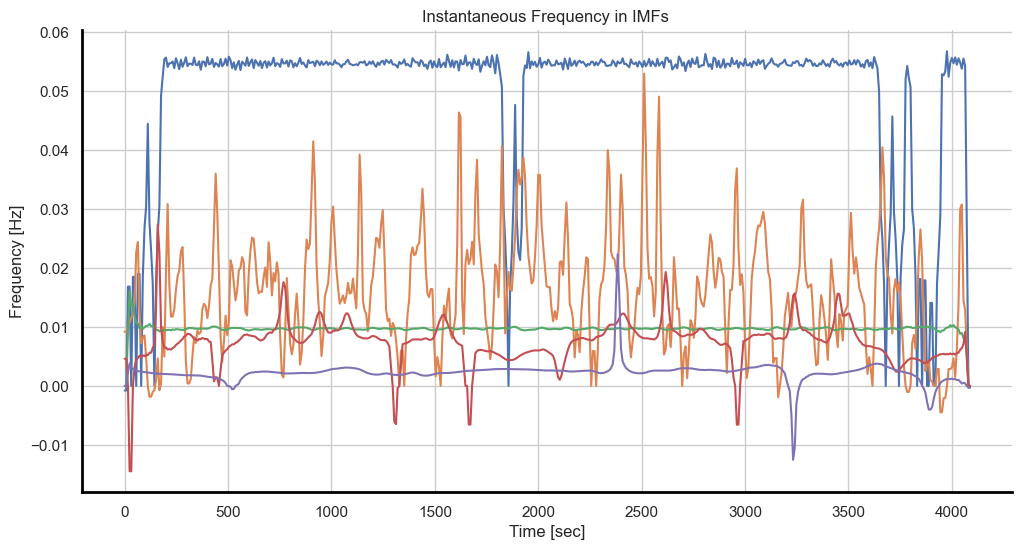

In [18]:
# Plotting instantaneous frequency for signal 2

plt.plot(t, IF_x2)
plt.title('Instantaneous Frequency in IMFs ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Power')

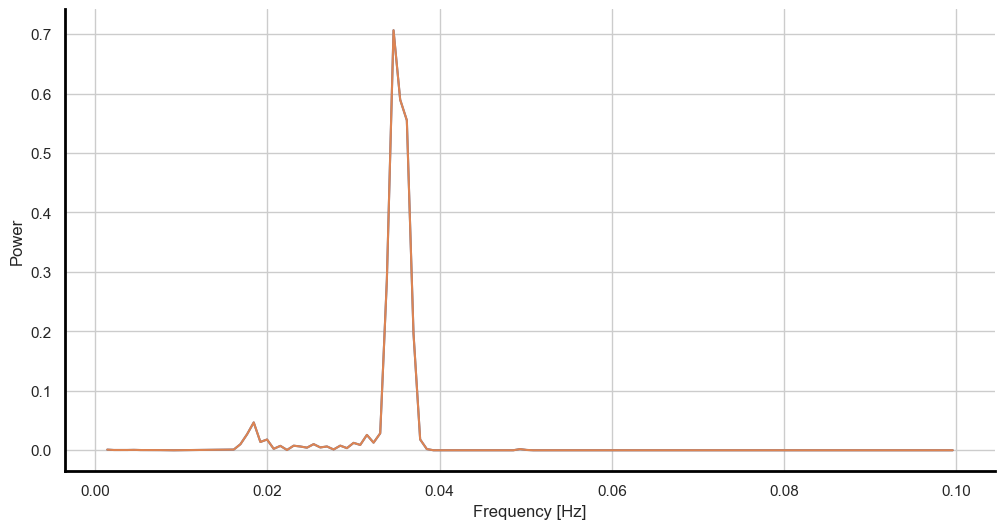

In [19]:
# Applying HHT to IMFs of x1

f_range = (1e-3, 1e-1, 128)
hht_x1, spec = emd.spectra.hilberthuang(IF_x1, IA_x1, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power') 


Text(0, 0.5, 'Power')

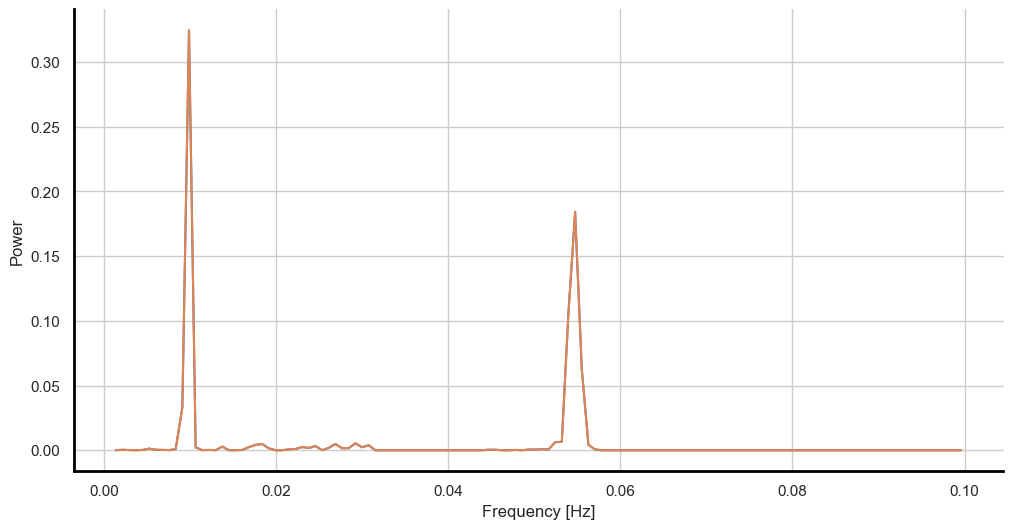

In [20]:
# Applying HHT to IMFs of x2

f_range = (1e-3, 1e-1, 128)
hht_x2, spec = emd.spectra.hilberthuang(IF_x2, IA_x2, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power') 